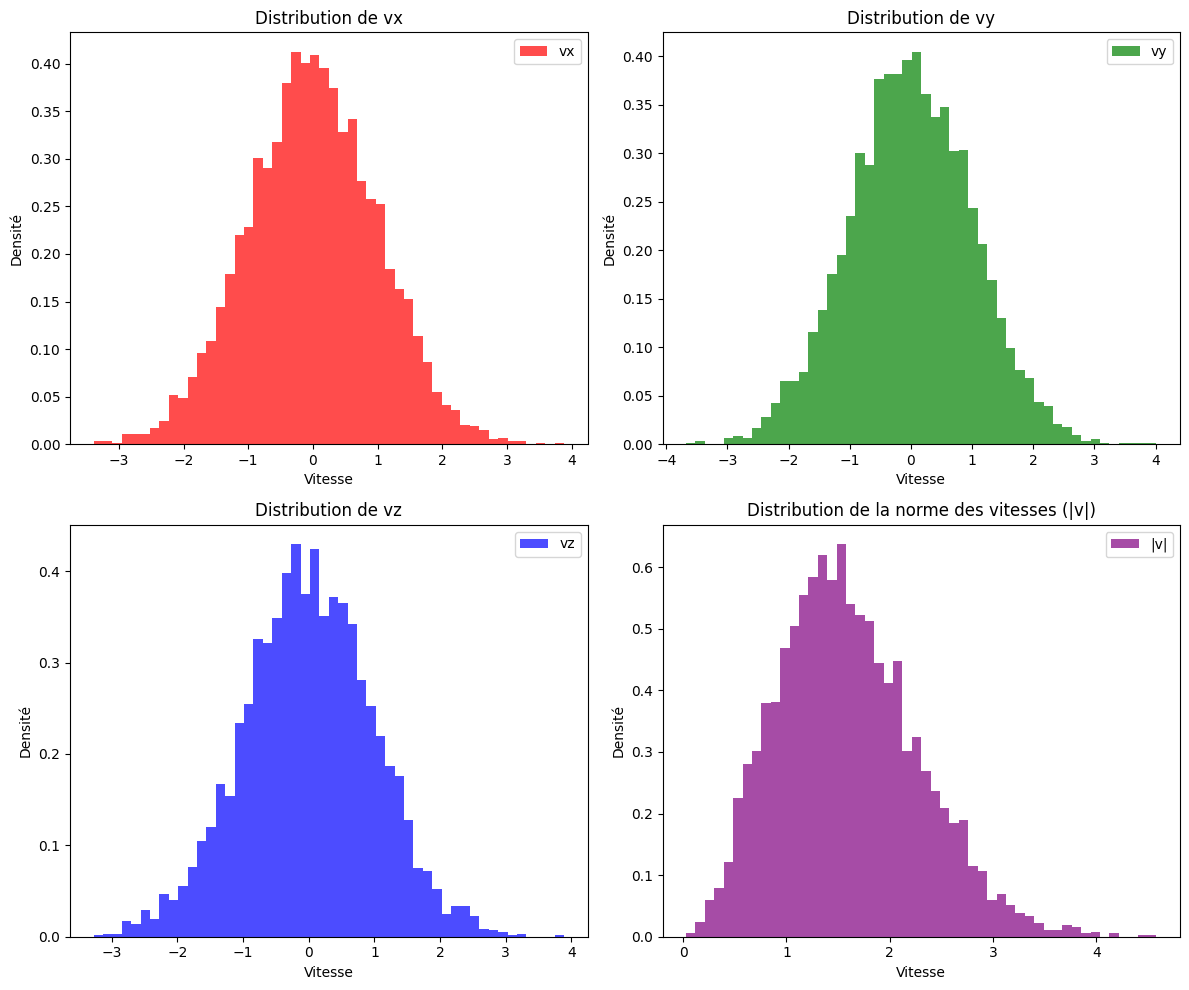

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier dump (ignorer les lignes d'en-tête)
def load_velocities(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    # Cherche l'indice où commencent les données
    for i, line in enumerate(lines):
        if "ITEM: ATOMS" in line:
            start = i + 1
            break
    data = np.genfromtxt(lines[start:])
    vx, vy, vz = data[:, 5], data[:, 6], data[:, 7]
    return vx, vy, vz

vx, vy, vz = load_velocities("dump.velocities")
v_mag = np.sqrt(vx**2 + vy**2 + vz**2)

# Histogrammes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(vx, bins=50, density=True, alpha=0.7, color='r', label='vx')
axs[0, 0].set_title("Distribution de vx")

axs[0, 1].hist(vy, bins=50, density=True, alpha=0.7, color='g', label='vy')
axs[0, 1].set_title("Distribution de vy")

axs[1, 0].hist(vz, bins=50, density=True, alpha=0.7, color='b', label='vz')
axs[1, 0].set_title("Distribution de vz")

axs[1, 1].hist(v_mag, bins=50, density=True, alpha=0.7, color='purple', label='|v|')
axs[1, 1].set_title("Distribution de la norme des vitesses (|v|)")

for ax in axs.flat:
    ax.set_xlabel("Vitesse")
    ax.set_ylabel("Densité")
    ax.legend()

plt.tight_layout()
plt.show()